In [1]:
!pip install gradio scikit-learn pandas matplotlib seaborn

# 🩺 Diabetes Predictor Web App (Gradio)  
**Libraries:** Python, scikit-learn, pandas, gradio  
**Description:** Predicts diabetes probability based on user input with an interactive Gradio interface.  

**Live Demo:** [Click here to open the app](https://c0c7ed118e6a8e695a.gradio.live
)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import gradio as gr

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
cols = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin",
        "BMI","DiabetesPedigreeFunction","Age","Outcome"]

df = pd.read_csv(url, names=cols)

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


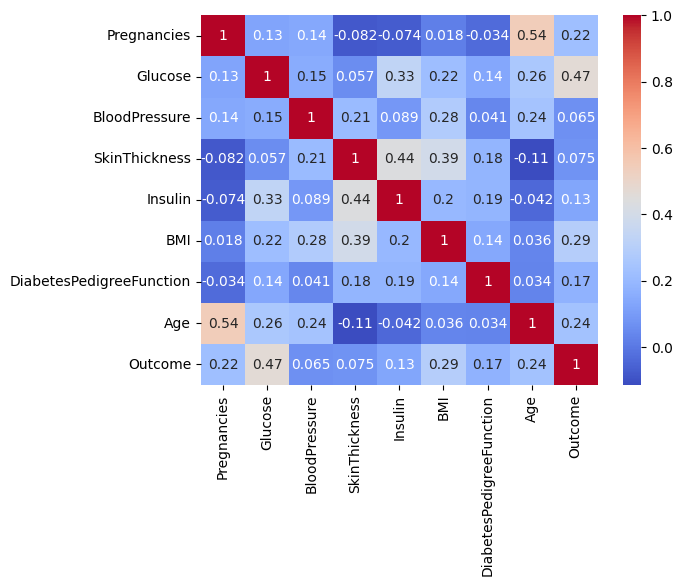

In [4]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [5]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



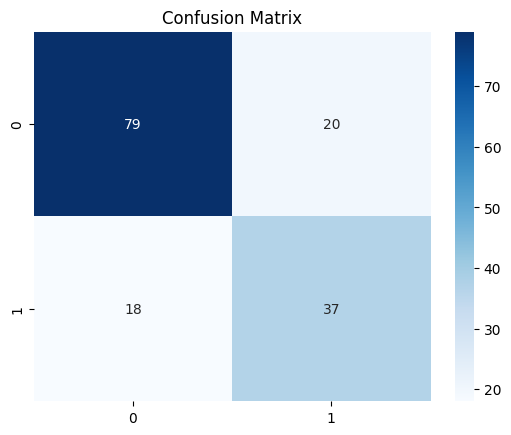

In [8]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    data = np.array([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]])
    data = scaler.transform(data)
    pred = model.predict(data)[0]
    return "✅ Diabetes Risk" if pred==1 else "❌ No Diabetes Risk"

iface = gr.Interface(
    fn=predict_diabetes,
    inputs=[
        gr.Number(label="Pregnancies"),
        gr.Number(label="Glucose"),
        gr.Number(label="BloodPressure"),
        gr.Number(label="SkinThickness"),
        gr.Number(label="Insulin"),
        gr.Number(label="BMI"),
        gr.Number(label="DiabetesPedigreeFunction"),
        gr.Number(label="Age")
    ],
    outputs="text",
    title="🩺 Diabetes Prediction App",
    description="Enter patient details to predict diabetes risk."
)

iface.launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://c0c7ed118e6a8e695a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
